# Augmented Dickey-Fuller Test 

Adfuller test is a quantitative method of checking stationarity in time series data. Adfuller test provides p value which we evaluate through unit root hypothesis testing where the null hypothesis $H_0$ is that the series is <em>nonstationary</em>, and contains a unit root. The alternate hypothesis $H_1$ supports <em>stationarity</em>.

<Strong><a href="http://datagyani.in/index.php/2021/09/01/analyze-time-series-data/">HOW TO ANALYZE TIME SERIES DATA…</a></Strong>

In [6]:
#let's import all the neccessary libraries
import pandas as pd # data processing
import numpy as np # data processing
import os #helps changing directory and locating your file

import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.stattools import adfuller

In [2]:
#changing directory
os.chdir('D:\\blog/Time Series')
os.getcwd()

'D:\\blog\\Time Series'

In [3]:
#reading the dataset
airline = pd.read_csv('airline.csv',index_col='Month',parse_dates=True)
#dropping NA if any in the dataset
airline.dropna(inplace=True)
#printing the  the first five column
airline.head()

,Passengers(in thousands)
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


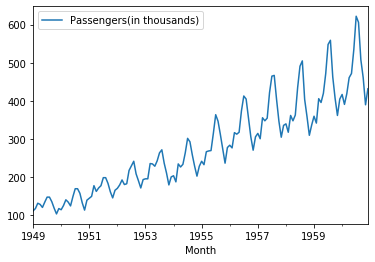

In [4]:
airline[['Passengers(in thousands)']].plot();

We can see that our data is non stationary but many time its hard to tell by looking at the graph. Let's check what the test suggest

In [7]:
adftest = adfuller(airline['Passengers(in thousands)'],autolag='AIC')
adftest

(0.8153688792060512,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

It's hard to tell what are these values in tupple

In [8]:
#let's run the help command to know what these values
help(adfuller)

Help on function adfuller in module statsmodels.tsa.stattools:

adfuller(x, maxlag=None, regression='c', autolag='AIC', store=False, regresults=False)
    Augmented Dickey-Fuller unit root test.
    
    The Augmented Dickey-Fuller test can be used to test for a unit root in a
    univariate process in the presence of serial correlation.
    
    Parameters
    ----------
    x : array_like, 1d
        The data series to test.
    maxlag : int
        Maximum lag which is included in test, default 12*(nobs/100)^{1/4}.
    regression : {'c','ct','ctt','nc'}
        Constant and trend order to include in regression.
    
        * 'c' : constant only (default).
        * 'ct' : constant and trend.
        * 'ctt' : constant, and linear and quadratic trend.
        * 'nc' : no constant, no trend.
    
    autolag : {'AIC', 'BIC', 't-stat', None}
        Method to use when automatically determining the lag.
    
        * if None, then maxlag lags are used.
        * if 'AIC' (default) or 

In [9]:
#Let's write function that shows these values properly

def adf_test(series,title=''):
    """
    Pass in a time series and returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [13]:
adf_test(airline['Passengers(in thousands)'])

Augmented Dickey-Fuller Test: 
ADF test statistic        0.815369
p-value                   0.991880
# lags used              13.000000
# observations          130.000000
critical value (1%)      -3.481682
critical value (5%)      -2.884042
critical value (10%)     -2.578770
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


Adfuller clearly tells that the data is non-stationary. We will this fuction in our forecasting models as well to determine whetehr the data is stationary or not